In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

To decide which feature should be used as the root node, we can use Gini's impurity/index or entropy to determine this.
If target column has high number of classes, it is better to use entropy

##EDA
- Data analysis: shape,info,describe,dtypes,corr
- Missing values
- Outliers detection
- Visualization

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In target column,1 indicates person is having heart disease and 0 means person is not having heart disease

**age**: the age of the patient in years.

**sex**: the sex of the patient (1 = male, 0 = female).

**cp**: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

**trestbps**: the resting blood pressure of the patient in mm Hg.

**chol**: the serum cholesterol level of the patient in mg/dl.

**fbs**: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

**restecg**: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

**thalach**: the maximum heart rate achieved by the patient during exercise.
exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: the ST depression induced by exercise relative to rest.
slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest
Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

**ca**: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

**thal**: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).

In [3]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [13]:
#Correlation-relationship between 2 variables
#Positive corr - directly proportional
#Negative corr - inversely proportional
#Zero corr - no effect
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

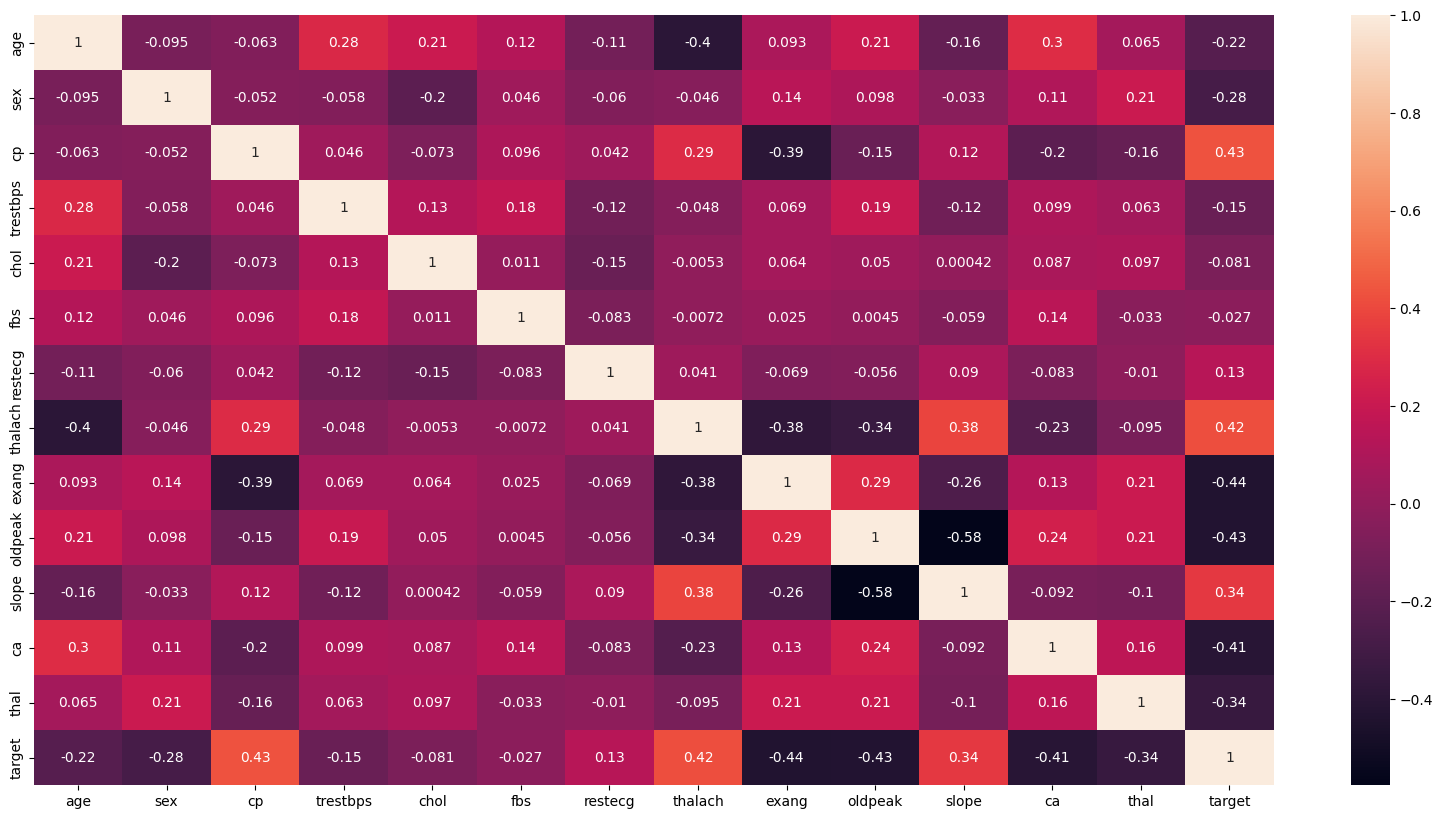

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
#check for majority of males/females recorded
df['sex'].value_counts()    #0-female,1-male

1    206
0     96
Name: sex, dtype: int64

In [20]:
#check for majority of heart patients/healthy people
df['target'].value_counts()     #1-heart patients,0-healthy people

1    164
0    138
Name: target, dtype: int64

Above age of 30, there is more chance of getting a heart disease

In [22]:
#cholestrol level
df[df['chol']>200].shape

(252, 14)

252 people have higher risk of getting heart disease based on higher cholestrol level

In [23]:
#thallium
df[df['thal']==2].shape

(165, 14)

165 is Number of people that can be cured as they are having reversible thallium condition

*use shift+tab to get function

###Check for outliers

<Axes: xlabel='chol'>

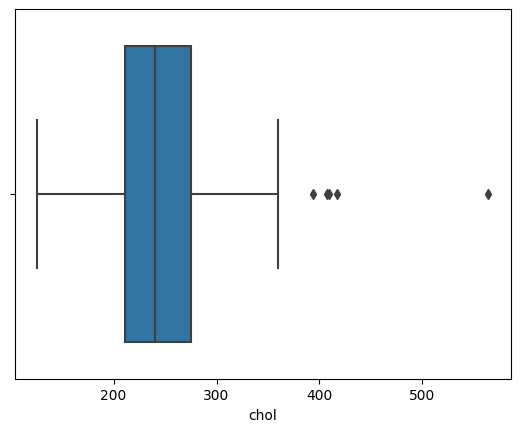

In [24]:
sns.boxplot(x='chol',data=df)

No need to remove/treat outliers in case of tree based algorithms

###Visualization - distribution,skewness

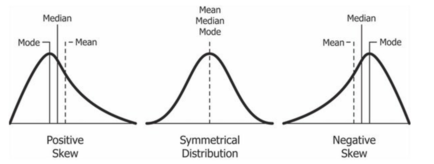

To find distributions of data we use plots like:
- matplotlib - histogram
- seaborn - distplot, histogram, kdeplot
- statistical test - shapiro wilk test

Text(0.5, 1.0, 'Age distribution')

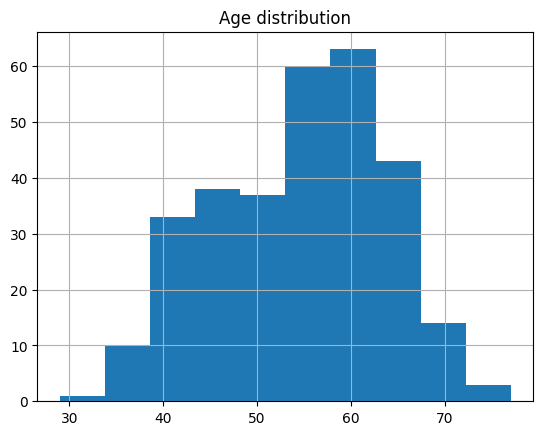

In [26]:
df['age'].hist(bins=10)
plt.title('Age distribution')

Age is negatively skewed

To smoothen the histogram, use distplot

<ipython-input-28-19f06fbf7026>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


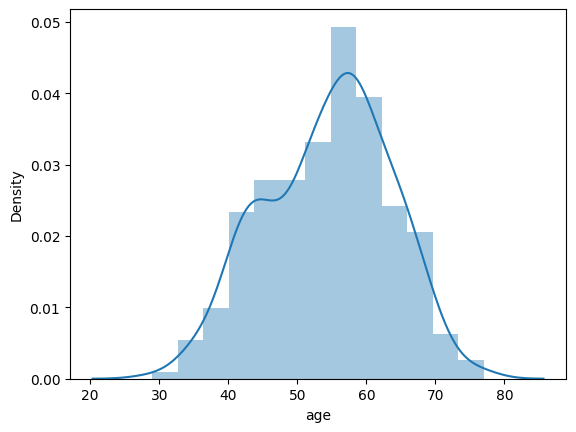

In [28]:
sns.distplot(df['age'])
plt.show()

<Axes: xlabel='age', ylabel='Density'>

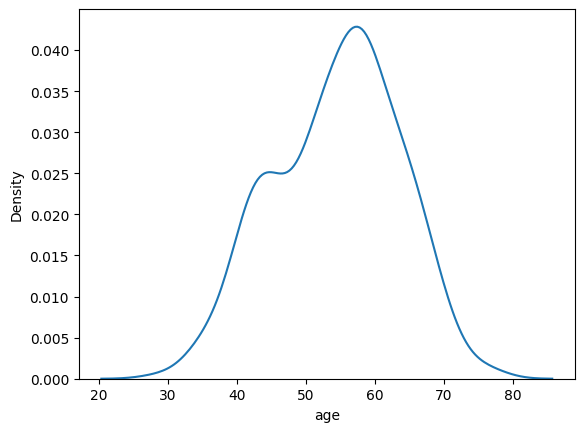

In [30]:
#kernel density estimation
sns.kdeplot(df['age'])

<ipython-input-32-6063486248ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],label='Male')
<ipython-input-32-6063486248ee>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'],label='Female')


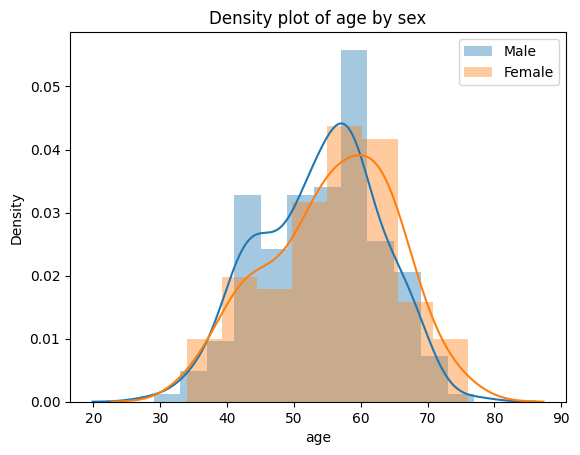

In [32]:
sns.distplot(df[df['sex']==1]['age'],label='Male')
sns.distplot(df[df['sex']==0]['age'],label='Female')
plt.title('Density plot of age by sex')

plt.legend()

<Axes: >

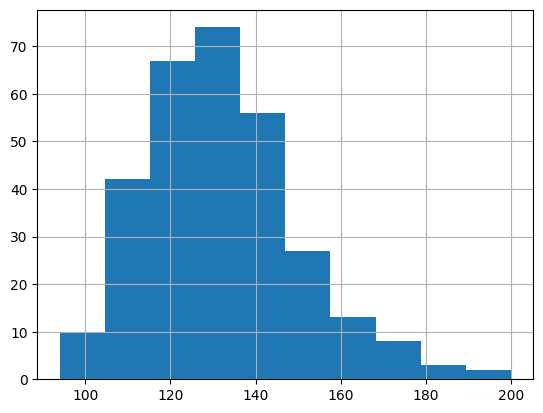

In [33]:
#checking for other column
df['trestbps'].hist()

<ipython-input-34-fd87906d7774>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'])


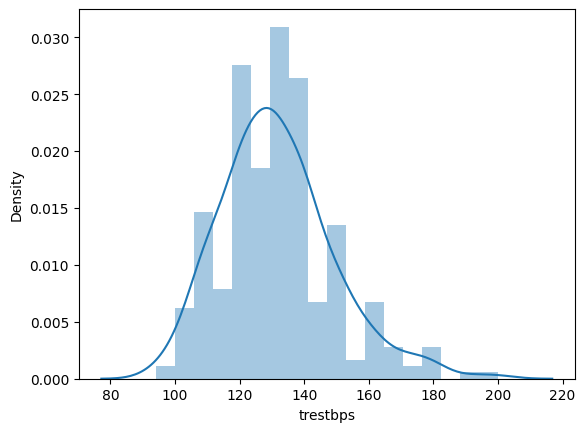

In [34]:
sns.distplot(df['trestbps'])
plt.show()

<Axes: xlabel='sex', ylabel='count'>

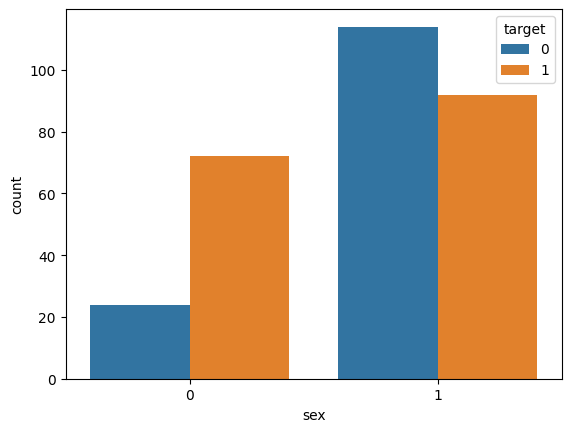

In [35]:
#countplot
sns.countplot(x=df['sex'],hue='target',data=df)

In females, more females are prone to have heart disease.

In general males are more prone to having heart disease than females

<Axes: xlabel='cp', ylabel='count'>

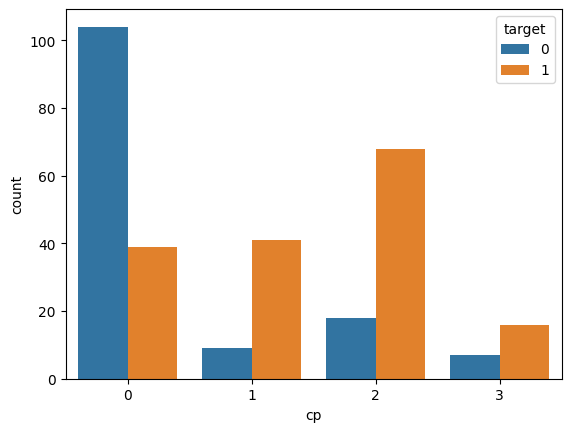

In [36]:
sns.countplot(x=df['cp'],hue='target',data=df)

 (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)

 In case of typical angina, less people have heart disease than those who have it

<Axes: xlabel='cp', ylabel='Count'>

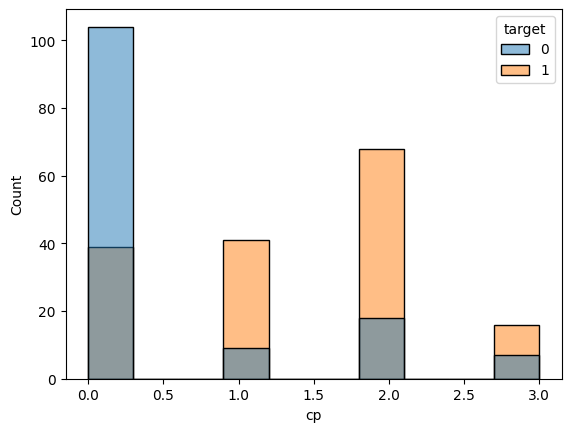

In [37]:
sns.histplot(x=df['cp'],hue='target',data=df)

Histplot is difficult to understand than countplot

##Supervised model building
- Classification model
- Divide data into dependant and independant column
- Divide data into train and test
- Build and create the model
- Train the model
- Test the model: predict function
- Check the models performance(classification): accuracy, confusion matrix, classification report
- If its a regression problem then: r2 score,rmse,mse,mae

In [38]:
x=df.iloc[:,:-1]    #independant column
y=df['target']      #dependant column

In [39]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
print(x_train.shape)
print(x_test.shape)

(211, 13)
(91, 13)


In [67]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

Here gini impurity criteria is used as observed from summary of decision tree classifier

In [68]:
pred_test=clf.predict(x_test)
pred_test

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1])

In [69]:
print('Accuracy for test data =',accuracy_score(pred_test,y_test)*100,'%')

Accuracy for test data = 76.92307692307693 %


In case of overfitting, train data gives good accuracy but test data gives less accuracy


Underfitting means both train and test have low accuracy

In [70]:
pred_train=clf.predict(x_train)
pred_train

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [71]:
print('Accuracy for train data =',accuracy_score(pred_train,y_train)*100,'%')

Accuracy for train data = 100.0 %


As training data has high accuracy but test data has low accuracy, this means the model has overfitting problem

Value of max_depth plays a huge role in determining the accuracy of decision tree

In [72]:
c_parameter_name='max_depth'
c_parameter_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1=pd.DataFrame(columns=['max_depth','accuracy'])
df1

,max_depth,accuracy


In [73]:
for i in c_parameter_values:
    model=tree.DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)*100
    df1=df1.append({'max_depth':i,'accuracy':acc_score},ignore_index=True)

df1

<ipython-input-73-ca82cb80fa4c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':i,'accuracy':acc_score},ignore_index=True)
<ipython-input-73-ca82cb80fa4c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':i,'accuracy':acc_score},ignore_index=True)
<ipython-input-73-ca82cb80fa4c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':i,'accuracy':acc_score},ignore_index=True)
<ipython-input-73-ca82cb80fa4c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':i,'accuracy':acc_score},ignore_index=True)
<ipython-input-73-ca82cb80fa4c>:6: F

,max_depth,accuracy
0,1.0,76.923077
1,2.0,78.021978
2,3.0,86.813187
3,4.0,78.021978
4,5.0,76.923077
5,6.0,79.120879
6,7.0,79.120879
7,8.0,78.021978
8,9.0,79.120879
9,10.0,80.219780


From above it is observed that max depth of 3 is giving the highest accuracy

In [77]:
model=tree.DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)*100
print('Accuracy when max_depth is set to 3 =',acc_score,'% (highest)')

Accuracy when max_depth is set to 3 = 86.81318681318682 % (highest)


Thus accuracy of the model was increased by tuning the parameter

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.495\nsamples = 211\nvalue = [95, 116]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.409\nsamples = 101\nvalue = [72, 29]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 48\nvalue = [23, 25]'),
 Text(0.0625, 0.125, 'gini = 0.4\nsamples = 29\nvalue = [8, 21]'),
 Text(0.1875, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.14\nsamples = 53\nvalue = [49, 4]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.4375, 0.125, 'gini = 0.078\nsamples = 49\nvalue = [47, 2]'),
 Text(0.75, 0.625, 'x[11] <= 0.5\ngini = 0.331\nsamples = 110\nvalue = [23, 87]'),
 Text(0.625, 0.375, 'x[9] <= 1.7\ngini = 0.171\nsamples = 74\nvalue = [7, 67]'),
 Text(0.5625, 0.125, 'gini = 0.091\nsamples = 63\nvalue = [3, 60]'),
 Text(0.6875, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.875, 0.375, 'x[9] <= 1.9\ngini = 0.494\nsamples = 36\nvalue = [16, 20]'),
 Text(0.8125, 0.1

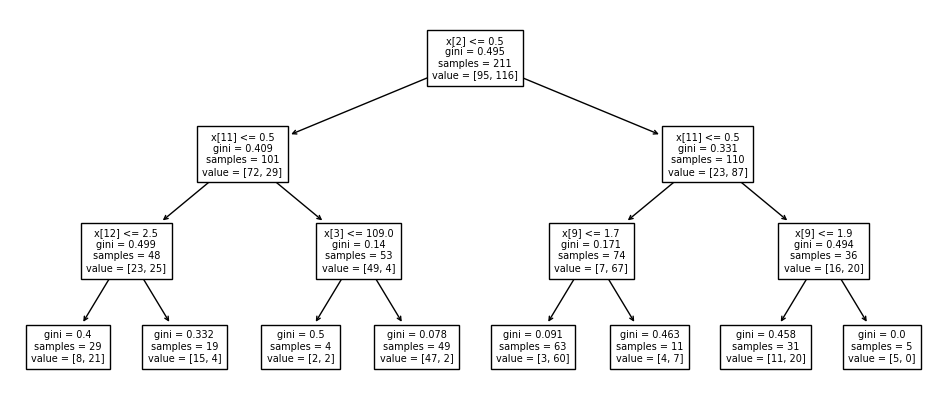

In [88]:
plt.figure(figsize=(12,5))
tree.plot_tree(model,fontsize=7)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        43
           1       0.82      0.96      0.88        48

    accuracy                           0.87        91
   macro avg       0.88      0.86      0.87        91
weighted avg       0.88      0.87      0.87        91



recall=tp / (tp + fn)

The recall is the measure of our model correctly identifying True Positives.

Thus, for all the people who actually have heart disease,
recall tells us how many were correctly identified as a heart patient.

Layman definition: Of all the actual positive examples out there,
how many of them did I correctly predict to be positive?


precision of class 0 = TP of class 0/total number of object

What is the Precision for our model?

Yes, it is 0.73 or, when it predicts that a patient has heart disease, it is correct around 73% of the time.

precision of class 1 = TP of class 1/total number of object

Layman definition: Of all the positive predictions I made, how many of them are truly positive?



macro average = (precision of class 0 + precision of class 1)/2


weighted average is precision of all classes merge together

weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1)


F1-score is a measure of a model's accuracy on a dataset

A good F1 score means that you have low false positives and low false negatives

Accuracy is used when the True Positives and True negatives are more important while

F1-score is used when the False Negatives and False Positives are crucial.

Support is the number of actual occurrences of the class in the specified dataset.


Accuracy tells you how many times the ML model was correct overall.

Precision is how good the model is at predicting a specific category.

Recall tells you how many times the model was able to detect a specific category.

##Advanced ML
- Improve accuracy by Hyperparameter tuning

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris  # You can replace this with your dataset


# Define the Decision Tree classifier
clf = DecisionTreeClassifier()

In [90]:
# Define a dictionary of hyperparameters and their possible values to search through
param_grid = {
  "max_depth" : [None,1,2,3,4,5,10],
  "min_samples_split" : [2,5,10],
  "min_samples_leaf" : [1,2,4],
  "criterion" : ["gini", "entropy" ]
}

In [92]:
# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)  # You can adjust the number of cross-validation folds (cv) as needed

# Perform the grid search
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [93]:
# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score:  0.8143169398907103
